Colab Link

<a href="https://colab.research.google.com/github/Adfermar/SAA_Unidad1_Ejercicios_Preprocesamiento/blob/20_11_2022/SAA_ejercicios_preprocesamiento%20v13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# HEAD


================================================================================

Tarea PR UD 4.1

================================================================================


---



**TASK**: Coches.Net


---



**AUTHOR**: Adonais Fernández Martín

**STUDY**: Inteligencia Artificial y Big Data

**COURSE**: Sistemas de Aprendizaje Automático

**LAST UPDATE** 27/04/2023

**VERSION** v0.0

---
Unicode:

> Tabulation >> `\u0009`

> Quotation Mark = `\u0022`

> Apostrophes = `\u0027`

### Installation

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Run only once

```python

python.exe -m pip install --upgrade pip

py -m pip install ipykernel

py -m venv woods

py -m pip install pandas

py -m pip install scikit-learn

py -m pip show scikit-learn

py -m pip install matplotlib

py -m pip install seaborn

```

In [ ]:
# VISUAL CODE STUDIO WORKSPACE COMMANDS

# cd .\Scripts

# .\activate

# deactivate

### Libraries


---



In [ ]:
import numpy as np
import pandas as pd

### Functions


---



In [ ]:
def featureDistribution(df, feature:pd.core.series.Series):

    from collections import Counter

    values = df[feature].values
    counter = Counter(values)
    for k, v in counter.items():
        p = v / len(values) * 100
        print(f'Class: {k}, Count: {v}, Percentage: {round(p, 2)}%')

# LOAD DATASET



### Dataset Summary

Mount Google Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset paths

In [ ]:
PATH = '/content/drive/MyDrive/BD/cochesnet-full-cleaned-27-04-2023-19-07.csv'
missing_values = ['', ' ']

Loading files

In [ ]:
import pandas as pd

try:
    df = pd.read_csv(
        PATH,
        # names=columns,
        skipinitialspace=True,
        na_values=missing_values, 
        header='infer')
except NameError as NE:
    (print(f"ERROR!!: <{NE}>' in file: <{PATH}>"))
except FileNotFoundError as FNF:
    raise Exception("ERROR!! File not found: {FNF}")
except:
    raise Exception("Unknown error")
else:
    print(f"File <{PATH}> loaded successfully")
finally:
    print("Program finalized")

File </content/drive/MyDrive/BD/cochesnet-full-cleaned-27-04-2023-19-07.csv> loaded successfully
Program finalized


### Scouting dataset

In [ ]:
NUMERIC_FEATURES = df.select_dtypes(include=[np.number]).columns.to_list()
CATEGORICAL_FEATURES = df.select_dtypes(exclude=[np.number]).columns.to_list()

In [ ]:
df.head()

,color,fuelType,km,make,model,province,transmissionType,year,seller_type,bodyType,cubicCapacity,doors,hp,price
0,white,gas_licuado_glp,48100,opel,corsa,barcelona,manual,2018,private,sedan,1398,5,90,15500
1,blue,gasolina,43990,opel,corsa,barcelona,manual,2021,profesional,sedan,1199,5,100,16600
2,beige,diesel,31000,opel,combo_life,las_palmas,manual,2021,private,minivan,1499,5,102,23500
3,gray,gasolina,57964,opel,crossland,ciudad_real,manual,2021,profesional,4x4,1199,5,110,18950
4,gray,gasolina,104000,opel,astra,sta_c_tenerife,manual,2018,profesional,sedan,1399,5,125,12790


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13326 entries, 0 to 13325
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   color             13326 non-null  object
 1   fuelType          13326 non-null  object
 2   km                13326 non-null  int64 
 3   make              13326 non-null  object
 4   model             13326 non-null  object
 5   province          13326 non-null  object
 6   transmissionType  13326 non-null  object
 7   year              13326 non-null  int64 
 8   seller_type       13326 non-null  object
 9   bodyType          13326 non-null  object
 10  cubicCapacity     13326 non-null  int64 
 11  doors             13326 non-null  int64 
 12  hp                13326 non-null  int64 
 13  price             13326 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.5+ MB


In [ ]:
df[CATEGORICAL_FEATURES].describe()

,color,fuelType,make,model,province,transmissionType,seller_type,bodyType
count,13326,13326,13326,13326,13326,13326,13326,13326
unique,13,7,38,469,51,2,2,9
top,white,diesel,mercedes_benz,cx5,madrid,manual,profesional,sedan
freq,4356,6770,1109,282,3135,7804,12518,6792


In [ ]:
df[NUMERIC_FEATURES].describe()

,km,year,cubicCapacity,doors,hp,price
count,13326.000000,13326.000000,13326.000000,13326.000000,13326.000000,13326.000000
mean,73548.820276,6060.591325,1692.129446,4.767147,148.976212,24332.807219
std,42338.158848,7555.233032,543.313510,0.650499,75.097202,17760.419737
min,10000.000000,2012.000000,647.000000,2.000000,60.000000,4000.000000
25%,38396.250000,2018.000000,1396.000000,5.000000,110.000000,15450.000000
50%,68000.000000,2019.000000,1560.000000,5.000000,130.000000,20500.000000
75%,101000.000000,2022.000000,1991.000000,5.000000,153.500000,27900.000000
max,180000.000000,20220.000000,6496.000000,5.000000,800.000000,450000.000000


Plotting dataset histograms

<ipython-input-253-d02b447d96e3>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[NUMERIC_FEATURES].hist(ax = plt.figure(figsize = (10, 10)).gca())


array([[<Axes: title={'center': 'km'}>, <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'cubicCapacity'}>,
        <Axes: title={'center': 'doors'}>],
       [<Axes: title={'center': 'hp'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

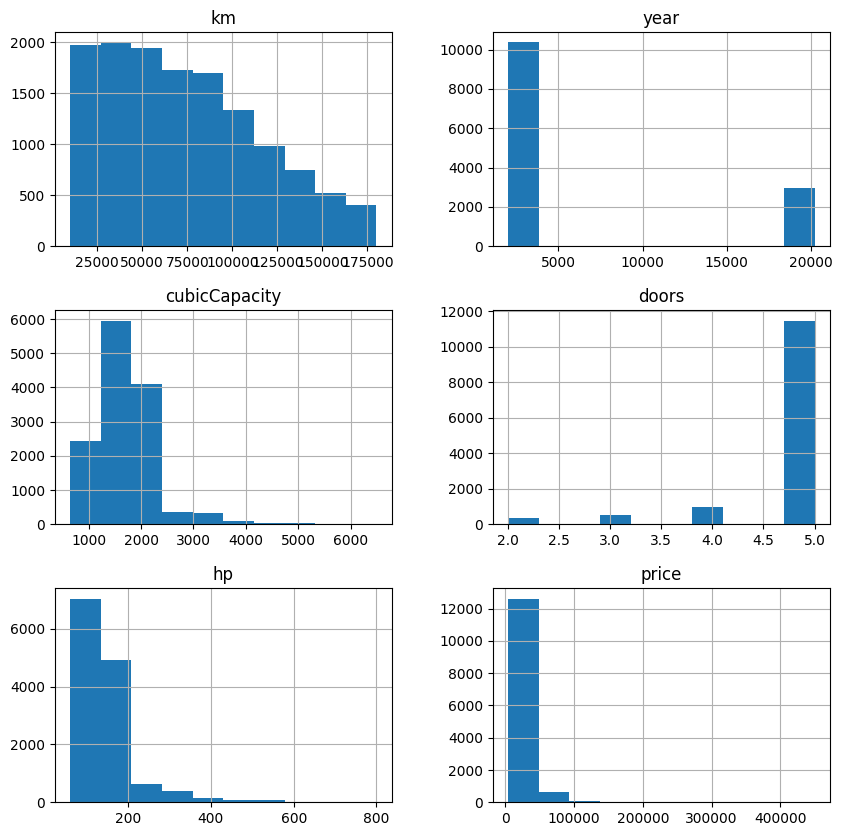

In [ ]:
import matplotlib.pyplot as plt

df[NUMERIC_FEATURES].hist(ax = plt.figure(figsize = (10, 10)).gca())

In [ ]:
# Getting the amount of unique values for each column name
df.nunique()

color                 13
fuelType               7
km                  7332
make                  38
model                469
province              51
transmissionType       2
year                  22
seller_type            2
bodyType               9
cubicCapacity        170
doors                  4
hp                   249
price               1830
dtype: int64

# PREPARATION of DATASET



***Pre-processing***

---

> * [Dataset data cleaning by W3 Schools](https://www.w3schools.com/python/pandas/pandas_cleaning.asp)


Steps:

*   Loading dataset from file with extended missing values
*   Drop from dataset columns that not makes any difference
*   Check wrong data in binary columns
*   Checking columns data types
*   Showing columns with wrong data types
*   Casting dataframe columns to expected data type
*   Duplicates
*   Replacing empty cells, missing data, NaN and other NA values which descriptive statistic of tendency `mean`
*   Get and remove influential outliers
*   Get and remove other outliers
*   Reset DataFrame Index
*   Encoding Categorical Data
*   Scaling data
*   Feature correlation
*   Feature selection

### Loading dataset from file with extended missing values and selecting the index to use


---



Already done:
```python
pd.read_csv('file', na_values=['', ' ', '?'], index_col='index')
```

In [ ]:
df_cleaned = df.copy()

### Drop from dataset columns that not makes any difference


---



Dropping three numerical features that have non clear meaning.

Also removing `native_country` as it is deeply imbalanced

In [ ]:
"""
df_cleaned.drop(columns=['', 
                         '',
                         '', 
                         ''], inplace=True)
"""                    

"\ndf_cleaned.drop(columns=['', \n                         '',\n                         '', \n                         ''], inplace=True)\n"

### Missing values, empty cells, NaN, NA


---



In [ ]:
# Total NaN values in dataset 
print(f'Total NaN values: {df_cleaned.isna().sum().sum()}')
print(f'---------------------')
# Total missing values by column
print(f'Total NaN values:\n{df_cleaned.isna().sum()}')

Total NaN values: 0
---------------------
Total NaN values:
color               0
fuelType            0
km                  0
make                0
model               0
province            0
transmissionType    0
year                0
seller_type         0
bodyType            0
cubicCapacity       0
doors               0
hp                  0
price               0
dtype: int64


In [ ]:
# df_cleaned[''].mode(dropna=True)[0]
# df_cleaned.fillna(
#     {'': df_cleaned[''].mode(dropna=True)[0],
#      '': df_cleaned[''].mode(dropna=True)[0]},
#      inplace = True
# )
# print(df_cleaned.isna().sum().sum())

### Checking data types


---





Checking if a dataframe column has a wrong data type.

Reference data types must be set by hand.

> Three functions than should help us checking data types:

```python
DataFrame.convert_dtypes()
DataFrame.infer_objects()
pandas.Series.astype()
```

In [ ]:
df_cleaned.describe()

,km,year,cubicCapacity,doors,hp,price
count,13326.000000,13326.000000,13326.000000,13326.000000,13326.000000,13326.000000
mean,73548.820276,6060.591325,1692.129446,4.767147,148.976212,24332.807219
std,42338.158848,7555.233032,543.313510,0.650499,75.097202,17760.419737
min,10000.000000,2012.000000,647.000000,2.000000,60.000000,4000.000000
25%,38396.250000,2018.000000,1396.000000,5.000000,110.000000,15450.000000
50%,68000.000000,2019.000000,1560.000000,5.000000,130.000000,20500.000000
75%,101000.000000,2022.000000,1991.000000,5.000000,153.500000,27900.000000
max,180000.000000,20220.000000,6496.000000,5.000000,800.000000,450000.000000


Casting dataframe columns to a more suitable data type

In [ ]:
df_cleaned.replace({'doors': {5:'5', 2:'2', 3:'3', 4:'4'}}, inplace=True)
df_cleaned.head(10)

,color,fuelType,km,make,model,province,transmissionType,year,seller_type,bodyType,cubicCapacity,doors,hp,price
0,white,gas_licuado_glp,48100,opel,corsa,barcelona,manual,2018,private,sedan,1398,5,90,15500
1,blue,gasolina,43990,opel,corsa,barcelona,manual,2021,profesional,sedan,1199,5,100,16600
2,beige,diesel,31000,opel,combo_life,las_palmas,manual,2021,private,minivan,1499,5,102,23500
3,gray,gasolina,57964,opel,crossland,ciudad_real,manual,2021,profesional,4x4,1199,5,110,18950
4,gray,gasolina,104000,opel,astra,sta_c_tenerife,manual,2018,profesional,sedan,1399,5,125,12790
5,gray,gasolina,99000,opel,cabrio,sta_c_tenerife,manual,2018,profesional,cabrio,1598,2,136,18900
6,blue,gasolina,39000,opel,corsa,sevilla,automatic,2017,profesional,sedan,1398,5,90,12900
7,black,gasolina,13013,opel,corsa,tarragona,manual,2021,profesional,sedan,1199,5,100,17250
8,black,gas_licuado_glp,155000,opel,mokka_x,sevilla,manual,2018,profesional,4x4,1364,5,140,14990
9,white,diesel,128922,opel,antara,alicante,manual,2012,profesional,4x4,2231,5,163,11450


In [ ]:
df_cleaned = df_cleaned.infer_objects()
df_cleaned = df_cleaned.convert_dtypes()
# Cast data specifically
df_cleaned = df_cleaned.astype({
    'km':np.uint64,
    'cubicCapacity':np.uint64,
    'hp':np.uint16,
    'price':np.uint64,
    'year':np.uint16
})
df_cleaned.dtypes

color               string
fuelType            string
km                  uint64
make                string
model               string
province            string
transmissionType    string
year                uint16
seller_type         string
bodyType            string
cubicCapacity       uint64
doors               string
hp                  uint16
price               uint64
dtype: object

### Summarize features


---

> * Splitting labels/features into input and output (or 'target') variables

> * Warning: ***Non supervised*** machine learning problems do not distinguish between input and output classes.

In [ ]:
import numpy as np

TARGET = 'price'

ALL_FEATURES = list(df_cleaned)
ALL_FEATURES_BUT_TARGET = ALL_FEATURES.copy()
ALL_FEATURES_BUT_TARGET.remove(TARGET)
# Another way to obtain feature names
# ----------------------------------------
# ALL_FEATURES = df_cleaned.columns.values

NUMERIC_FEATURES = df_cleaned.select_dtypes(include=[np.number]).columns.to_list()
NUMERIC_FEATURES.remove(TARGET)

CATEGORICAL_FEATURES = df_cleaned.select_dtypes(exclude=[np.number]).columns.to_list()
# CATEGORICAL_FEATURES.remove(TARGET)

print(f'All Features: {ALL_FEATURES}')
print(f'Target: [{TARGET}]')
print(f'Numeric features: {NUMERIC_FEATURES}')
print(f'Categorical features: {CATEGORICAL_FEATURES}')
print(f'All features but target one: {ALL_FEATURES_BUT_TARGET}')

All Features: ['color', 'fuelType', 'km', 'make', 'model', 'province', 'transmissionType', 'year', 'seller_type', 'bodyType', 'cubicCapacity', 'doors', 'hp', 'price']
Target: [price]
Numeric features: ['km', 'year', 'cubicCapacity', 'hp']
Categorical features: ['color', 'fuelType', 'make', 'model', 'province', 'transmissionType', 'seller_type', 'bodyType', 'doors']
All features but target one: ['color', 'fuelType', 'km', 'make', 'model', 'province', 'transmissionType', 'year', 'seller_type', 'bodyType', 'cubicCapacity', 'doors', 'hp']


### Cast all numeric features (but TARGET) to `float`

So it will be possible to replace outliers by centrality statistics

In [ ]:
# CAST ALL NUMERIC FEATURES TO FLOAT
df_cleaned[NUMERIC_FEATURES] = df_cleaned[NUMERIC_FEATURES].astype(float)
df_cleaned.dtypes

color                string
fuelType             string
km                  float64
make                 string
model                string
province             string
transmissionType     string
year                float64
seller_type          string
bodyType             string
cubicCapacity       float64
doors                string
hp                  float64
price                uint64
dtype: object

### Change dataset's index
---



### Normalize dataset values


---



In [ ]:
from unidecode import unidecode
import re

def cleanString(input:str):
    output = input
    # 
    pattern = r'(?:\\u00)'
    reg = re.compile(pattern)    
    if reg.search(input): output =  output.encode().decode('unicode_escape')
    else: output =  output.encode().decode()    
    # Remove leading and talining white spaces (trimming)
    # Replacing inner white spaces by '_'
    # Set all characters to lower-case
    output = output.strip().replace(' ', '_').replace('-', '_').lower()
    # Replacing accented characters by non-accented ones
    output = unidecode(output)
    output = ''.join(['a' if ord(c) >= 128 else c for c in output])
    # Removing all non-ascii character from string
    output =  output.encode('ascii', 'ignore').decode('ascii')
    # Keeping only alpha-numeric characters plus '_' in string
    output = re.sub(r'[^\w\s|_]+', '', output)

    return output

In [ ]:
# df_cleaned.replace('-', '_', inplace=True, regex=True)
# df_cleaned.loc[:, CATEGORICAL_FEATURES] = \
#     df_cleaned[CATEGORICAL_FEATURES].applymap(lambda x: cleanString(str(x)))

### Transform target variable


---


In [ ]:
# df_cleaned.replace(
#     {'target': r'[>]'}, 
#     {'target': 1}, 
#     inplace=True, 
#     regex=True)
# df_cleaned.loc[:, 'target'] = df_cleaned['target'].astype(int)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# df_cleaned.replace({'': r'[.]'}, {'': ''}, inplace=True, regex=True)
# transformer = LabelEncoder()
# df_cleaned.loc[:, ''] = transformer.fit_transform(df_cleaned[''])
# df_cleaned = df_cleaned.astype({'': np.byte})
# list(df_cleaned[''].unique())

### Duplicates


---


Removing duplicate rows from dataframe

In [ ]:
before = df_cleaned.shape[0]
print(f"Num. of rows before: {before}")
print(f"-----------------------------------")
df_cleaned = df_cleaned.drop_duplicates()
after = df_cleaned.shape[0]
print(f"Num. of rows after: {after}")
print(f"-----------------------------------")
print(f"Dulicated dropped: {before - after}")
# Reset dataframe index
df_cleaned.reset_index(drop=True, inplace=True)

Num. of rows before: 13326
-----------------------------------
Num. of rows after: 13326
-----------------------------------
Dulicated dropped: 0


There was `0` duplicated rows in dataset

### Summarize target attribute

Counting the number of examples in each class, then use those counts to summarize the distribution.

The reason for summarize the class distribution is to study the data distribution in target class.

In [ ]:
# from collections import Counter

# featureDistribution(df_cleaned, TARGET)

### OUTLIERS


---



In [ ]:
def quantile_builder(df, feature_name, K):
    
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - K * IQR
    upper_whisker = Q3 + K * IQR

    return tuple((lower_whisker, upper_whisker))

In [ ]:
# Get all outliers
def get_outliers(df, feature_name, weak=True):

    if weak: K = 1.5
    else: K = 3.0

    whisker = quantile_builder(df, feature_name, K)
    
    return list(df.query(f'{feature_name} < @whisker[0] or {feature_name} > @whisker[1]').index)

In [ ]:
def jack_knife(df, feature_name, weak=True, centrality='mean'):

    outliers = list()
    
    # Create a dummy single-column dataframe filled with zeroes 
    # with same length as input dataframe
    df_temp = pd.DataFrame(
        data=np.zeros(df[feature_name].shape[0],  dtype=float),
        columns=[feature_name])

    # Jack-knife technique:
    # Populate each dummy dataframe's record with input dataframe 
    # column's centrality statistic computed excluding this i-ish-value.
    if centrality == 'mean':
        for i in df.index.values:
            df_temp.loc[i, feature_name] = df[feature_name].drop(i).mean()
    elif centrality == 'std':
        for i in df.index.values:
            df_temp.loc[i, feature_name] = df[feature_name].drop(i).std()
    elif centrality == 'mode':
        for i in df.index.values:
            df_temp.loc[i, feature_name] = df[feature_name].drop(i).mean()
    elif centrality == 'median':
        for i in df.index.values:
            df_temp.loc[i, feature_name] = df[feature_name].drop(i).median()  
    elif centrality == 'kurt':
        for i in df.index.values:
            df_temp.loc[i, feature_name] = df[feature_name].drop(i).kurt()   
    else:
        # ERROR. Return an empty dataframe
        return pd.DataFrame()

    outliers = get_outliers(df_temp, feature_name, weak)

    return outliers

In [ ]:
def replace_outliers(input, feature_name, outliers, centrality='mean'):
    # Statistic measure will be computed in data WITHOUT outliers.
    # Then data spotted as outlier wil be replaced by statistic value.

    output = input.copy()

    # Checking 'centrality' parameter
    if centrality == 'mean':
        statistic = output[feature_name].drop(outliers).mean()
    elif centrality == 'std':
        statistic = output[feature_name].drop(outliers).std()
    elif centrality == 'mode':
        statistic = output[feature_name].drop(outliers).mean()
    elif centrality == 'median':
        statistic = output[feature_name].drop(outliers).median()  
    elif centrality == 'kurt':
        statistic = output[feature_name].drop(outliers).kurt()   
    else:
        # ERROR. Return an empty dataframe
        return pd.DataFrame()

    # Replacing Series values by centrality statistic
    output.loc[outliers, feature_name] = statistic

    return output    

In [ ]:
import seaborn as sns

# mediante esta función de pueden visualizar los 'outliers'
def draw_hist_boxplot(df, feature_name):
  # se dibuja el diagrama de cajas
  sns.boxplot(x = feature_name, data = df)
  # se dibujan sobre el diagrama todos los puntos de datos que tiene la propiedad
  sns.stripplot(x = feature_name, data = df, color = "#474646")

#### Outliers in quantitative data

In [ ]:
df_temp = df_cleaned.copy()

We can spot all outliers (influential and stardard ones) using Jack-knife or stardard quantile techniques.


First we should split ***quantitative*** columns from ***categorical***, including ***boolean*** ones.

In [ ]:
# Numerical features
print(f'Numeric features: {NUMERIC_FEATURES}')

# Categorical/binary features
print(f'Categorical features: {CATEGORICAL_FEATURES}')

Numeric features: ['km', 'year', 'cubicCapacity', 'hp']
Categorical features: ['color', 'fuelType', 'make', 'model', 'province', 'transmissionType', 'seller_type', 'bodyType', 'doors']


Feature: `km`

In [ ]:
feature = 'km'

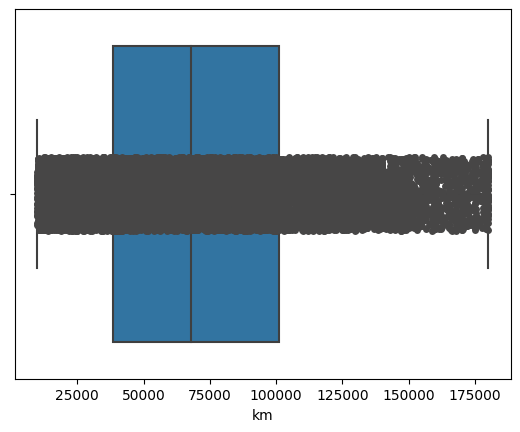

In [ ]:
import matplotlib.pyplot as plt

draw_hist_boxplot(df_temp, feature)

In [ ]:
# Weak Jack-Knife outliers computed by mean
outliers1 = jack_knife(df_temp, feature, True, 'mean')
print(f'Weak: {len(outliers1)}')
# Strong Jack-Knife outliers computed by mean
outliers2 = jack_knife(df_temp, feature, False, 'mean')
print(f'Strong: {len(outliers2)}')

Weak: 0
Strong: 0


In [ ]:
centrality = 'mean'
# df_temp = replace_outliers(df_temp, feature, outliers1, 'mean')
# df_temp.drop(labels=outliers1, axis=0, inplace=True)
# df_temp.reset_index(drop=True, inplace=True)

In [ ]:
import matplotlib.pyplot as plt

# draw_hist_boxplot(df_temp, feature)

Feature: `cubicCapacity`

In [ ]:
feature = 'cubicCapacity'

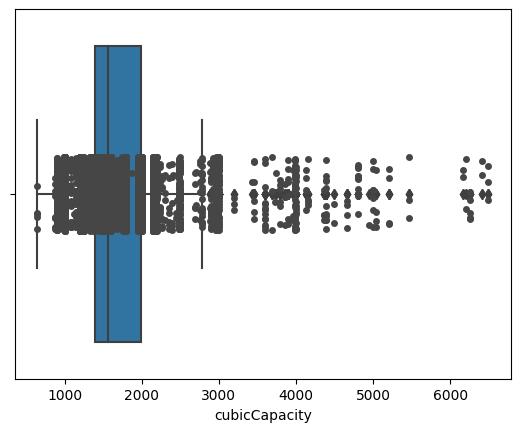

In [ ]:
import matplotlib.pyplot as plt

draw_hist_boxplot(df_temp, feature)

In [ ]:
# Weak Jack-Knife outliers computed by mean
outliers1 = jack_knife(df_temp, feature, True, 'mean')
print(f'Weak: {len(outliers1)}')
# Strong Jack-Knife outliers computed by mean
outliers2 = jack_knife(df_temp, feature, False, 'mean')
print(f'Strong: {len(outliers2)}')

Weak: 680
Strong: 140


In [ ]:
centrality = 'mean'
# df_temp = replace_outliers(df_temp, feature, jack_knife_outliers_w, 'mean')
df_temp.drop(labels=outliers1, axis=0, inplace=True)
df_temp.reset_index(drop=True, inplace=True)

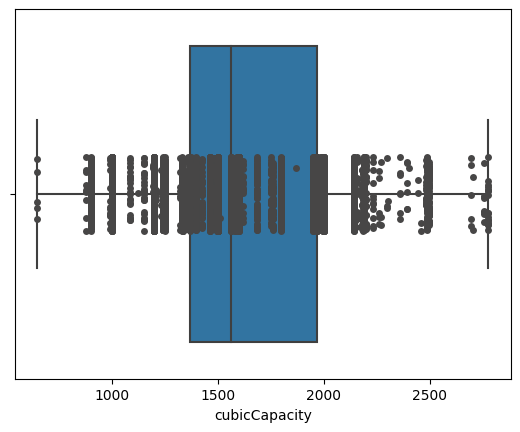

In [ ]:
import matplotlib.pyplot as plt

draw_hist_boxplot(df_temp, feature)



---



Feature: `hp`

In [ ]:
feature = 'hp'

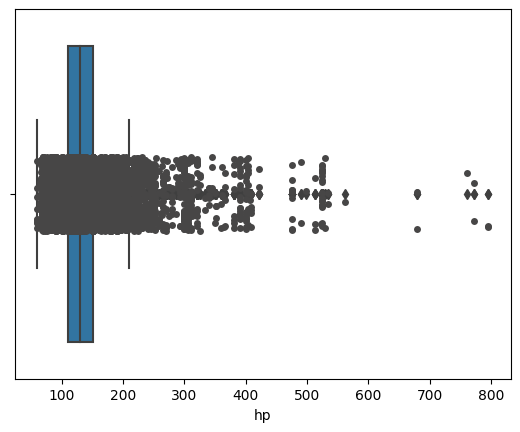

In [ ]:
import matplotlib.pyplot as plt

draw_hist_boxplot(df_temp, feature)

In [ ]:
# Weak Jack-Knife outliers computed by mean
outliers1 = jack_knife(df_temp, feature, True, 'mean')
print(f'Weak: {len(outliers1)}')
# Strong Jack-Knife outliers computed by mean
outliers2 = jack_knife(df_temp, feature, False, 'mean')
print(f'Strong: {len(outliers2)}')

Weak: 687
Strong: 303


Outliers will be replaced by `mean` statistic

In [ ]:
centrality = 'mean'
# df_temp = replace_outliers(df_temp, feature, jack_knife_outliers_w, 'mean')
df_temp.drop(labels=outliers1, axis=0, inplace=True)
df_temp.reset_index(drop=True, inplace=True)

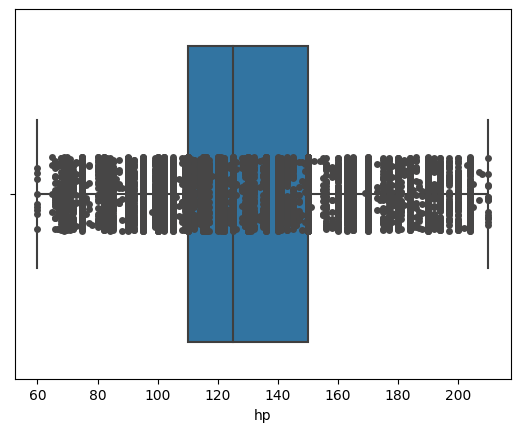

In [ ]:
import matplotlib.pyplot as plt

draw_hist_boxplot(df_temp, feature)



---



In [ ]:
before = df_cleaned.shape[0]
print(f"Num. of rows before: {before}")
print(f"-----------------------------------")
after = df_temp.shape[0]
print(f"Num. of rows after: {after}")
print(f"-----------------------------------")
print(f"Rows dropped: {before - after}")

Num. of rows before: 13326
-----------------------------------
Num. of rows after: 11959
-----------------------------------
Rows dropped: 1367


In [ ]:
df_cleaned = df_temp.copy()

In [ ]:
import gc
del df_temp
gc.collect()

14924

#### Outliers in categorical data

**Detecting outliers in the categorical data**

Reference:
[How to detect and treat outliers in categorical data? -analyticsindiamag.com-](https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data/)

There is no such concept of an outlier in the categorical data.

Anyway, ***we can say that categories with very lower or very higher frequency than the other categories can be considered as outliers*** in the categorical data.

Detecting outliers in the categorical data is something about the comparison between the percentage of availability of data for all the categories. 

We can find this comparison using the bar chart or histogram. 


In [ ]:
"""
# cantidad de elementos de cada clase
print(df_temp['color'].value_counts())

# representación gráfica de la cantidad de elementos de cada clase
plt.figure(figsize = (5, 3))
sns.countplot(df['color'])
plt.xlabel('Target classes')
plt.title('Class distribution')
"""

"\n# cantidad de elementos de cada clase\nprint(df_temp['color'].value_counts())\n\n# representación gráfica de la cantidad de elementos de cada clase\nplt.figure(figsize = (5, 3))\nsns.countplot(df['color'])\nplt.xlabel('Target classes')\nplt.title('Class distribution')\n"

In [ ]:
df_temp = df_cleaned.copy()

In [ ]:
df_temp[CATEGORICAL_FEATURES].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   color             11959 non-null  string
 1   fuelType          11959 non-null  string
 2   make              11959 non-null  string
 3   model             11959 non-null  string
 4   province          11959 non-null  string
 5   transmissionType  11959 non-null  string
 6   seller_type       11959 non-null  string
 7   bodyType          11959 non-null  string
 8   doors             11959 non-null  string
dtypes: string(9)
memory usage: 841.0 KB


In [ ]:
# df_temp.loc[:, feature] = df_temp[feature].str.replace('', '')
# df_temp.replace({'doors': {5:'5', 2:'2', 3:'3', 4:'4'}})
# featureDistribution(df_temp, feature)



---



In [ ]:
df_temp[CATEGORICAL_FEATURES].head(1)

,color,fuelType,make,model,province,transmissionType,seller_type,bodyType,doors
0,white,gas_licuado_glp,opel,corsa,barcelona,manual,private,sedan,5


In [ ]:
feature = df_temp.color
feature_name =  df_temp.color.name
featureDistribution(df_temp, feature_name)

Class: white, Count: 4059, Percentage: 33.94%
Class: blue, Count: 1362, Percentage: 11.39%
Class: beige, Count: 127, Percentage: 1.06%
Class: gray, Count: 2939, Percentage: 24.58%
Class: black, Count: 1641, Percentage: 13.72%
Class: red, Count: 1159, Percentage: 9.69%
Class: brown, Count: 182, Percentage: 1.52%
Class: green, Count: 103, Percentage: 0.86%
Class: yellow, Count: 85, Percentage: 0.71%
Class: orange, Count: 136, Percentage: 1.14%
Class: garnet, Count: 152, Percentage: 1.27%
Class: purple, Count: 13, Percentage: 0.11%
Class: pink, Count: 1, Percentage: 0.01%


In [ ]:
# Drop outliers
outliers = df_temp.query(f"{feature_name} in ['purple', 'yellow', 'green', 'pink']").index.to_list()
df_temp.drop(labels=outliers, axis=0, inplace=True)
df_temp.reset_index(drop=True, inplace=True)
# Replace outliers
# df_temp.replace({feature: {'pink':'white', 'purple':'white'}}, inplace=True)
featureDistribution(df_temp, feature_name)

Class: white, Count: 4059, Percentage: 34.52%
Class: blue, Count: 1362, Percentage: 11.58%
Class: beige, Count: 127, Percentage: 1.08%
Class: gray, Count: 2939, Percentage: 25.0%
Class: black, Count: 1641, Percentage: 13.96%
Class: red, Count: 1159, Percentage: 9.86%
Class: brown, Count: 182, Percentage: 1.55%
Class: orange, Count: 136, Percentage: 1.16%
Class: garnet, Count: 152, Percentage: 1.29%




---



In [ ]:
df_temp[CATEGORICAL_FEATURES].head(1)

,color,fuelType,make,model,province,transmissionType,seller_type,bodyType,doors
0,white,gas_licuado_glp,opel,corsa,barcelona,manual,private,sedan,5


In [ ]:
feature = df_temp.fuelType
feature_name =  df_temp.fuelType.name
featureDistribution(df_temp, feature_name)

Class: gas_licuado_glp, Count: 58, Percentage: 0.49%
Class: gasolina, Count: 4359, Percentage: 37.08%
Class: diesel, Count: 6259, Percentage: 53.24%
Class: electrico, Count: 128, Percentage: 1.09%
Class: hibrido_enchufable, Count: 54, Percentage: 0.46%
Class: hibrido, Count: 876, Percentage: 7.45%
Class: gas_natural_cng, Count: 23, Percentage: 0.2%


In [ ]:
# Drop outliers
outliers = df_temp.query(f"{feature_name} in ['gas_licuado_glp', 'hibrido_enchufable', 'gas_natural_cng']").index.to_list()
df_temp.drop(labels=outliers, axis=0, inplace=True)
df_temp.reset_index(drop=True, inplace=True)
# Replace outliers
# df_temp.replace({feature: {'gas_natural_cng':'diesel'}}, inplace=True)
featureDistribution(df_temp, feature_name)

Class: gasolina, Count: 4359, Percentage: 37.51%
Class: diesel, Count: 6259, Percentage: 53.85%
Class: electrico, Count: 128, Percentage: 1.1%
Class: hibrido, Count: 876, Percentage: 7.54%




---



In [ ]:
df_temp[CATEGORICAL_FEATURES].head(1)

,color,fuelType,make,model,province,transmissionType,seller_type,bodyType,doors
0,blue,gasolina,opel,corsa,barcelona,manual,profesional,sedan,5


In [ ]:
feature = df_temp.bodyType
feature_name =  df_temp.bodyType.name
featureDistribution(df_temp, feature_name)

Class: sedan, Count: 6114, Percentage: 52.61%
Class: minivan, Count: 984, Percentage: 8.47%
Class: 4x4, Count: 3000, Percentage: 25.81%
Class: cabrio, Count: 92, Percentage: 0.79%
Class: familiar, Count: 653, Percentage: 5.62%
Class: pick_up, Count: 18, Percentage: 0.15%
Class: coupe, Count: 60, Percentage: 0.52%
Class: berlina, Count: 413, Percentage: 3.55%
Class: 4x4_suv, Count: 288, Percentage: 2.48%


In [ ]:
# Drop outliers
outliers = df_temp.query(f"{feature_name} in ['coupe', 'pick_up', 'cabrio']").index.to_list()
df_temp.drop(labels=outliers, axis=0, inplace=True)
df_temp.reset_index(drop=True, inplace=True)
# Replace outliers
# df_temp.replace({feature: {'pick_up':'sedan'}}, inplace=True)
featureDistribution(df_temp, feature_name)

Class: sedan, Count: 6114, Percentage: 53.39%
Class: minivan, Count: 984, Percentage: 8.59%
Class: 4x4, Count: 3000, Percentage: 26.2%
Class: familiar, Count: 653, Percentage: 5.7%
Class: berlina, Count: 413, Percentage: 3.61%
Class: 4x4_suv, Count: 288, Percentage: 2.51%




---



In [ ]:
df_temp[CATEGORICAL_FEATURES].head(1)

,color,fuelType,make,model,province,transmissionType,seller_type,bodyType,doors
0,blue,gasolina,opel,corsa,barcelona,manual,profesional,sedan,5


In [ ]:
feature = df_temp.doors
feature_name =  df_temp.doors.name
featureDistribution(df_temp, feature_name)

Class: 5, Count: 10175, Percentage: 88.85%
Class: 3, Count: 424, Percentage: 3.7%
Class: 4, Count: 766, Percentage: 6.69%
Class: 2, Count: 87, Percentage: 0.76%


In [ ]:
# Drop outliers
outliers = df_temp.query(f"{feature_name} in ['2']").index.to_list()
df_temp.drop(labels=outliers, axis=0, inplace=True)
df_temp.reset_index(drop=True, inplace=True)
# Replace outliers
# df_temp.replace({feature: {'pick_up':'sedan'}}, inplace=True)
featureDistribution(df_temp, feature_name)

Class: 5, Count: 10175, Percentage: 89.53%
Class: 3, Count: 424, Percentage: 3.73%
Class: 4, Count: 766, Percentage: 6.74%


In [ ]:
df_cleaned = df_temp.copy()

In [ ]:
import gc
del df_temp
gc.collect()

48



---



---



### Scaling PCA analysis data

In [ ]:
df_temp = df_cleaned.copy()

In [ ]:
for c in CATEGORICAL_FEATURES:
    codes, uniques = pd.factorize(df_temp[c], sort=True)
    print(codes[:20])
    print(uniques)
    print('-------------------------------------------')
    df_temp.loc[:, c] = pd.Series(codes)

[2 0 5 5 2 1 8 5 8 8 1 1 5 8 5 2 1 7 5 1]
Index(['beige', 'black', 'blue', 'brown', 'garnet', 'gray', 'orange', 'red',
       'white'],
      dtype='string')
-------------------------------------------
[2 0 2 2 2 2 0 0 2 2 0 0 0 0 2 0 2 2 0 0]
Index(['diesel', 'electrico', 'gasolina', 'hibrido'], dtype='string')
-------------------------------------------
[23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23 23]
Index(['abarth', 'alfa_romeo', 'audi', 'bmw', 'chevrolet', 'citroen', 'cupra',
       'dacia', 'ds', 'fiat', 'ford', 'honda', 'hyundai', 'jaguar', 'jeep',
       'kia', 'land_rover', 'lexus', 'mazda', 'mercedes_benz', 'mini',
       'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 'renault', 'seat',
       'skoda', 'smart', 'ssangyong', 'subaru', 'suzuki', 'toyota',
       'volkswagen', 'volvo'],
      dtype='string')
-------------------------------------------
[ 90  86  94  26  90  90  22 169  90  90 225  26  26  26  90 184 170  94
 169  90]
Index(['108', '2008', '207

<ipython-input-314-0974c8bbf51e>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_temp.loc[:, c] = pd.Series(codes)


In [ ]:
from sklearn.preprocessing import StandardScaler

# -------------------------------------------------------------
# Standard Scaler thechnique for scaling data
# -------------------------------------------------------------
try:
    scaler_temp = StandardScaler()
    df_temp1 = pd.DataFrame(
        scaler_temp.fit_transform(
            df_temp.loc[:, ALL_FEATURES_BUT_TARGET]
        ), columns = ALL_FEATURES_BUT_TARGET)   
except Exception as err:
    raise ValueError(">> ==== ERROR!!. Scaling data error ====")
df_temp2 = pd.concat([df_temp1, df_temp[TARGET]], axis=1)

In [ ]:
df_temp2 = df_temp2.infer_objects()
df_temp2 = df_temp2.convert_dtypes()

## Dependence between the target response and a set of input features of interest


---


In [ ]:
df_temp2.corr()

,color,fuelType,km,make,model,province,transmissionType,year,seller_type,bodyType,cubicCapacity,doors,hp,price
color,1.000000,0.039289,-0.007404,0.026414,-0.016598,-0.004837,0.068307,-0.008502,0.007520,-0.019494,-0.054752,-0.003426,-0.098487,-0.074294
fuelType,0.039289,1.000000,-0.377097,0.087257,-0.064363,-0.011330,0.063616,-0.070565,0.052155,0.024164,-0.438589,-0.057967,-0.161720,-0.069992
km,-0.007404,-0.377097,1.000000,0.050059,0.062989,0.041219,0.040243,0.024576,-0.117475,0.097141,0.251157,-0.024295,0.085600,-0.372184
make,0.026414,0.087257,0.050059,1.000000,0.093193,0.001990,0.024287,-0.455845,0.033348,-0.026159,-0.044409,0.112569,-0.075902,-0.101233
model,-0.016598,-0.064363,0.062989,0.093193,1.000000,-0.004356,-0.114090,0.108613,-0.010734,-0.054617,0.177438,0.095447,0.223498,0.158511
province,-0.004837,-0.011330,0.041219,0.001990,-0.004356,1.000000,0.037930,-0.046896,0.036424,0.026401,-0.033240,0.000459,-0.035280,-0.075678
transmissionType,0.068307,0.063616,0.040243,0.024287,-0.114090,0.037930,1.000000,-0.154734,0.021829,0.065131,-0.419448,0.008714,-0.516178,-0.548573
year,-0.008502,-0.070565,0.024576,-0.455845,0.108613,-0.046896,-0.154734,1.000000,-0.061720,0.162730,0.383011,0.019063,0.271948,0.236274
seller_type,0.007520,0.052155,-0.117475,0.033348,-0.010734,0.036424,0.021829,-0.061720,1.000000,-0.098399,-0.050994,0.047456,-0.102995,0.052737
bodyType,-0.019494,0.024164,0.097141,-0.026159,-0.054617,0.026401,0.065131,0.162730,-0.098399,1.000000,-0.028666,-0.200504,-0.212535,-0.305818


<Axes: >

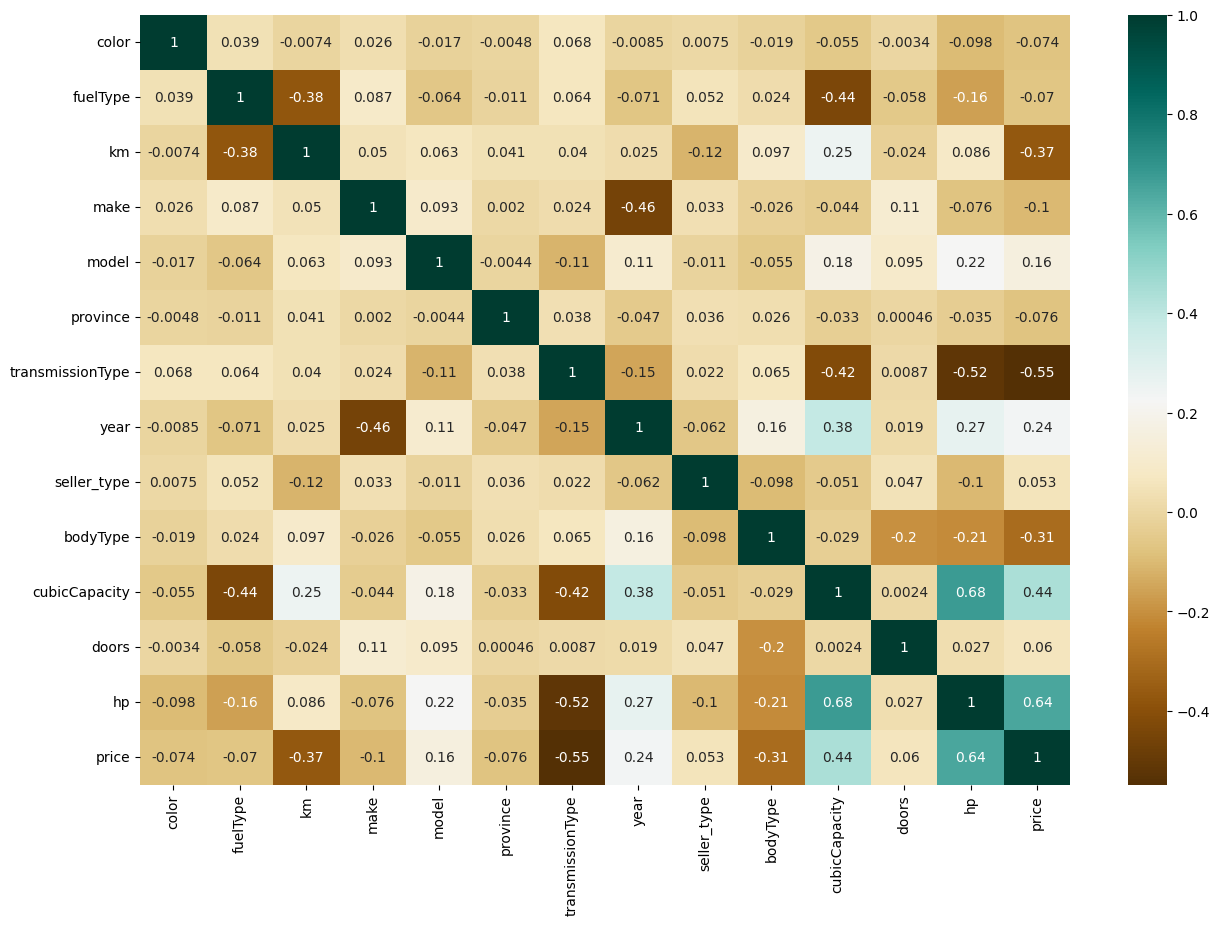

In [ ]:
# Correlation between input and output variable
plt.figure(figsize = (15, 10))
sns.heatmap(df_temp2.corr(), annot = True, cmap = 'BrBG')

## Selecting the features with highest variability using PCA  and HEATMAP:

PCA => [Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

Shows features accumulative variance through all data

      color  fuelType        km      make     model  province  \
0 -1.995500  0.062194  0.473220  0.669970  0.204349 -1.094854   
1 -0.598131  0.652200 -1.064689  1.524738  0.583468 -1.490552   
2 -1.745523 -1.111699  0.632480 -0.332659  0.532554 -1.028473   
3 -1.320362  0.201807 -0.701351  0.170916 -0.886592  0.315055   
4 -1.178001 -0.241507  0.708949  1.026773 -1.504630  0.146870   

   transmissionType      year  seller_type  bodyType  cubicCapacity     doors  \
0          1.233330 -0.845709    -0.633990  0.067760      -0.197887  0.182564   
1          2.395031  2.723007    -0.214198 -1.688840      -0.937527 -0.520440   
2         -0.005184  0.180241     0.434227  0.695633      -0.221963 -0.404062   
3         -0.070069  0.379402    -1.022840  1.117342      -0.199271  0.566874   
4          0.697804  0.084065    -1.329038 -0.423450       0.880252 -0.638630   

         hp  
0 -0.058342  
1  0.302322  
2 -0.086036  
3 -0.174322  
4  0.575880  


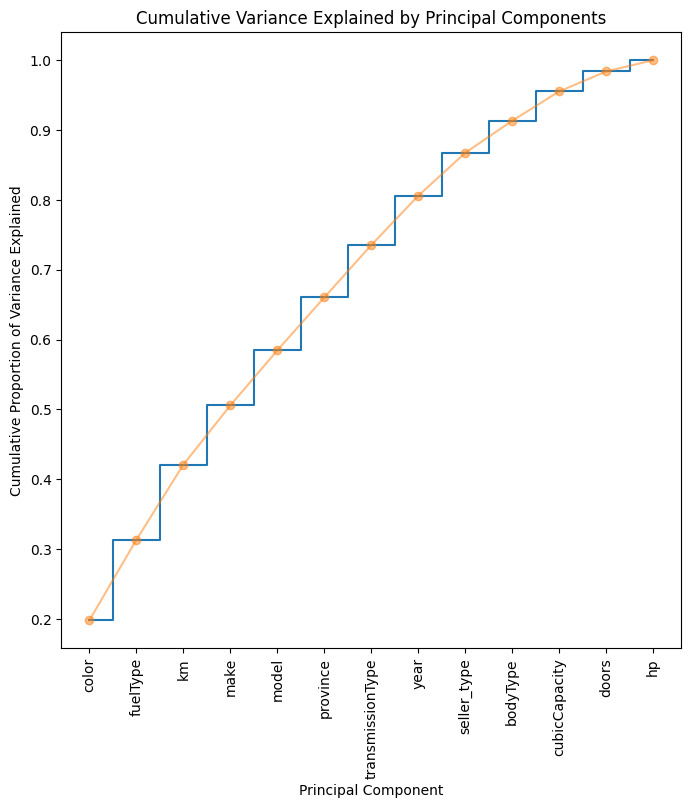

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(df_temp2[ALL_FEATURES_BUT_TARGET]) 

columns = list(df_temp2[ALL_FEATURES_BUT_TARGET].columns.values)
# columns = ['PCA_' + str(i) for i in range(1, pca.n_components_+1)]

pca_df = pd.DataFrame(data=pca_data, 
    columns=columns)

pca_df.columns = columns
print(pca_df.head())

# --------------------------------------------------------------------------

plt.rcParams['figure.figsize'] = 8, 8
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')


plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), columns, rotation=90)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), 'o-', alpha=0.5)


plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()

COLUMNS REJECTED:

    'cubicCapacity'

Wipe out temp dataframe

In [ ]:
import gc

del df_temp, df_temp1, df_temp2

gc.collect()

4244

## Features Selection Summing-Up

Keeping all features but `cubicCapacity` into dataset.

In [ ]:
df_cleaned.head(1)

,color,fuelType,km,make,model,province,transmissionType,year,seller_type,bodyType,cubicCapacity,doors,hp,price
0,blue,gasolina,43990.0,opel,corsa,barcelona,manual,2021.0,profesional,sedan,1199.0,5,100.0,16600


In [ ]:
columns = ALL_FEATURES
columns_rejected = [
    'cubicCapacity',
]
columns_to_keep = [col for col in columns if col not in columns_rejected]
print(columns_to_keep)
print(columns_rejected)
print(columns_to_keep + columns_rejected)

['color', 'fuelType', 'km', 'make', 'model', 'province', 'transmissionType', 'year', 'seller_type', 'bodyType', 'doors', 'hp', 'price']
['cubicCapacity']
['color', 'fuelType', 'km', 'make', 'model', 'province', 'transmissionType', 'year', 'seller_type', 'bodyType', 'doors', 'hp', 'price', 'cubicCapacity']


## Turning categorical attributes on numeric codes


---



**Pandas Factorize**

> * [Pandas Factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html#pandas.factorize)

> *  Encode the object as an enumerated type or categorical variable.

In [ ]:
df_temp = df_cleaned[columns_to_keep].copy()

In [ ]:
# for c in CATEGORICAL_FEATURES:
#     codes, uniques = pd.factorize(df_temp[c], sort=True)
#     print(f'---------------------------------------\n{c}')
#     print(codes[:20])
#     print(uniques)
#     print('-------------------------------------------')
#     df_temp.loc[:, c] = pd.Series(codes)

**Scikit-Learn Label Encoder**

> * [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

> * Encode target labels with value between 0 and n_classes-1.

**Get dummies**

> * [Get dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

> * Convert categorical variable into dummy/indicator variables..

In [ ]:
df_cleaned_transformed = df_temp.copy()
df_temp.head().T

,0,1,2,3,4
color,2.0,0.0,5.0,5.0,2.0
fuelType,2.0,0.0,2.0,2.0,2.0
km,43990.0,31000.0,57964.0,104000.0,39000.0
make,23.0,23.0,23.0,23.0,23.0
model,90.0,86.0,94.0,26.0,90.0
province,9.0,26.0,15.0,42.0,40.0
transmissionType,1.0,1.0,1.0,1.0,0.0
year,2021.0,2021.0,2021.0,2018.0,2017.0
seller_type,1.0,0.0,1.0,1.0,1.0
bodyType,5.0,4.0,0.0,5.0,5.0


### Sumarize features

In [ ]:
# Placing 'TARGET' columnt to last position
df_temp = pd.concat([df_temp.drop(TARGET, axis=1), df_temp[TARGET]], axis=1)
ALL_FEATURES_TRANSFORMED = list(df_temp)
ALL_FEATURES_TRANSFORMED_BUT_TARGET = ALL_FEATURES_TRANSFORMED.copy()
ALL_FEATURES_TRANSFORMED_BUT_TARGET.remove(TARGET)
print(f'All Features: {ALL_FEATURES_TRANSFORMED}')
print(f'All Features but Target: {ALL_FEATURES_TRANSFORMED_BUT_TARGET}')
print(f'Target: [{TARGET}]')

All Features: ['color', 'fuelType', 'km', 'make', 'model', 'province', 'transmissionType', 'year', 'seller_type', 'bodyType', 'doors', 'hp', 'price']
All Features but Target: ['color', 'fuelType', 'km', 'make', 'model', 'province', 'transmissionType', 'year', 'seller_type', 'bodyType', 'doors', 'hp']
Target: [price]


Wipe out temp dataframe

In [ ]:
import gc

del df_temp
gc.collect()

0

## Scaler for cleaned data


---

> * [Min Max Scaler Technique](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

> * [Standard Scaler Technique](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

Using `Standard Scaler`: removes data ***mean*** and divides by ***standard deviation***.

In [ ]:
df_temp = df_cleaned_transformed.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# -------------------------------------------------------------
# Choose Standard Scaler or MinMax technique to scaling data
# -------------------------------------------------------------
try:
    scaler = MinMaxScaler()
    # scaler = StandardScaler()
    df_temp = pd.DataFrame(
        scaler.fit_transform(
            df_cleaned_transformed.loc[:, ALL_FEATURES_TRANSFORMED_BUT_TARGET]
        ), columns = ALL_FEATURES_TRANSFORMED_BUT_TARGET)   
except Exception as err:
    raise ValueError(">> ==== ERROR!!. Scaling data error ====")
df_cleaned_transformed_scaled = pd.concat([df_temp, df_cleaned_transformed[TARGET]], axis=1)
# -----------------------------------------------------------------------------

Wipe out temp dataframe

In [ ]:
import gc

del df_temp
gc.collect()

0

## Setting data for testing/building final model/make predictions


---



In [ ]:
df_temp = df_cleaned_transformed_scaled.copy()

In [ ]:
import random

index_list = [random.randint(0, df_temp.shape[0]) for i in range(0, 5)]

print(index_list)
# Build df_pred with five random records from main dataframe
df_pred = df_temp.iloc[index_list, :]
# Drop records from main dataframe
df_temp.drop(labels=index_list, axis=0, inplace=True)
# Reset dataframe index
df_pred.reset_index(drop=True, inplace=True)

[11064, 10268, 3503, 2374, 6546]


In [ ]:
from sklearn.model_selection import train_test_split

X = df_temp[ALL_FEATURES_TRANSFORMED_BUT_TARGET].to_numpy()
y = df_temp[TARGET].to_numpy()

# For binary classification
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size = 0.25, random_state = None, stratify=y)

# For numeric regression
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.25, random_state = None)

y_train = np.asmatrix(y_train)
y_val = np.asmatrix(y_val)

data1 = np.concatenate((X_train, y_train.T), axis=1)
data2 = np.concatenate((X_val, y_val.T), axis=1)

df_train = pd.DataFrame(data=data1, columns=ALL_FEATURES_TRANSFORMED)
df_val= pd.DataFrame(data=data2, columns=ALL_FEATURES_TRANSFORMED)

In [ ]:
df_pred.head()

,color,fuelType,km,make,model,province,transmissionType,year,seller_type,bodyType,doors,hp,price
0,1.000,0.000000,0.745159,0.057143,0.038356,0.28,1.0,0.995606,1.0,0.4,1.0,0.333333,14900
1,1.000,0.000000,0.768412,0.514286,0.589041,0.18,1.0,0.996156,1.0,1.0,1.0,0.366667,13890
2,1.000,0.000000,0.635294,0.542857,0.205479,0.52,0.0,0.000110,1.0,1.0,0.5,0.733333,18900
3,0.125,0.666667,0.215341,0.142857,0.115068,0.18,1.0,0.000494,1.0,1.0,1.0,0.153333,15200
4,0.625,0.000000,0.094118,0.685714,0.013699,0.26,0.0,0.000494,1.0,1.0,1.0,0.466667,21400


In [ ]:
df_pred.info()

In [ ]:
df_cleaned.head()

In [ ]:
df_cleaned_transformed.head()

In [ ]:
df_train.info()

In [ ]:
df_val.info()

In [ ]:
import sys

sys.getsizeof(df_temp)

Wipe out temp dataframe

In [ ]:
import gc

del df_temp
gc.collect()

0

## SAVE DATA



---



In [ ]:
# -------------------------------------------------------------------
import pickle
from datetime import datetime
import pytz
# -------------------------------------------------------------------
tz = pytz.timezone("Europe/Madrid")
now = datetime.now(tz)
formatted_date = now.strftime("%d_%m_%Y_%H_%M")
# -------------------------------------------------------------------
BASE = '/content/'
SUFFIX = '.pkl'
# FILENAME = 'preprocess_50K_' + formatted_date 
FILENAME = 'preprocess_cochesnet_' + formatted_date 
PATH = BASE + FILENAME + SUFFIX
# -------------------------------------------------------------------
try:
    with open(PATH, 'wb') as f:
        pickle.dump([
            df_train, 
            df_val,
            df_pred, 
            df_cleaned,
            df_cleaned_transformed,
            df_cleaned_transformed_scaled,
            scaler
        ], f)
except NameError as NE:
    (print(f"ERROR!!: <{NE}>' in file: <{PATH}>"))
except FileNotFoundError as FNF:
    raise Exception("ERROR!! File not found: {FNF}")
except:
    raise Exception("Unknown error")
else:
    print(f"Data <{PATH}> saved successfully")
finally:
    print("Program finalized")
    f.close() # Check if file was closed properly

Data </content/preprocess_cochesnet_28_04_2023_18_20.pkl> saved successfully
Program finalized




---



---



---



<!-- Remember that `` was transformed into `` and `` labels -->